In [1]:
import pandas as pd
Retail_df=pd.read_csv(r"C:\Users\BALA JI\Documents\python\retailsales.csv" , encoding="ISO-8859-1")
Retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


###### Data cleaning ###

In [2]:
Retail_df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [3]:
Retail_df['UnitPrice'] = Retail_df['UnitPrice'].replace('13541.33', '')

In [4]:
Retail_df.drop(Retail_df[Retail_df['InvoiceNo'].str.startswith('C')].index, inplace=True)

In [5]:
Retail_df.shape

(532621, 8)

In [6]:
Retail_df[Retail_df['Quantity']>=1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


###### Feature engineering##

In [7]:
Retail_df['Amount'] = Retail_df['Quantity'] * Retail_df['UnitPrice']
Retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [8]:
Retail_df['InvoiceDate'] = pd.to_datetime(Retail_df['InvoiceDate'], errors='coerce')
Retail_df['Year'] = Retail_df['InvoiceDate'].dt.year
Retail_df['Month'] = Retail_df['InvoiceDate'].dt.month
Retail_df['Time'] = Retail_df['InvoiceDate'].dt.time
Retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Year,Month,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,08:26:00


In [9]:
import numpy as np
Retail_df['sqrt_Amount'] = np.sqrt(Retail_df['Amount'])
Retail_df['Domestic'] = np.where(Retail_df['Country']=='United Kingdom', 1, 0)
Retail_df.head()

C:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Year,Month,Time,sqrt_Amount,Domestic
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,08:26:00,3.911521,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,08:26:00,4.509989,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,08:26:00,4.690416,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,08:26:00,4.509989,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,08:26:00,4.509989,1


In [10]:
null_count = pd.isnull(Retail_df["InvoiceNo"]).sum()
print ('Number of null values:', null_count)

Number of null values: 0


In [81]:
unique_value_invoice=len(pd.unique(Retail_df["InvoiceNo"]))
print ('Number of Total values invoices:', unique_value_invoice)

Number of Total values invoices: 22064


In [12]:
null_count = pd.isnull(Retail_df["CustomerID"]).sum()
print ('Number of null values:', null_count)

Number of null values: 134697


In [13]:
unique_value=len(pd.unique(Retail_df["CustomerID"]))
print ('Number of unique values:', unique_value)

Number of unique values: 4340


In [ ]:
total_order = (pd.unique(Retail_df["CustomerID"]))
print (total_order)

In [15]:
# total data - null values 
541909 - 135080

406829

In [16]:
# average visit of a customer in our platform ( deviding Notnull value with unique )
406829 / 4373 

93.03201463526183

In [17]:
null_count / 93

1448.3548387096773

In [18]:
#estimated unique customers are 
4340 + 1452

5792

In [82]:
# Average amount of transaction     
amount= (Retail_df["Quantity"]) * (Retail_df["UnitPrice"])
total_amount= amount.sum()
Average_amount = total_amount / unique_value_invoice
print(Average_amount)

482.4401932559827


In [83]:
# Average basket size 
basket = (Retail_df["Quantity"]).sum()
Average_basket = round( basket/unique_value_invoice )
print(Average_basket)

247


In [23]:
top_sale=Retail_df["Month"].value_counts().nlargest(5)
print(top_sale)
top_sale_time=Retail_df["Time"].value_counts().nlargest(5)
print(top_sale_time)

11    83635
12    66918
10    59542
9     49421
7     38833
Name: Month, dtype: int64
15:56:00    2622
14:41:00    2549
15:17:00    2366
16:14:00    2345
14:09:00    2163
Name: Time, dtype: int64


In [24]:
# Types of product in store
distinct_products=len(pd.unique(Retail_df["Description"]))
print ('Number of unique values product:',  distinct_products)

Number of unique values product: 4208


In [25]:
top_products= Retail_df["Description"].value_counts().nlargest(20)
print(top_products)

WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
JUMBO BAG PINK POLKADOT               1238
HEART OF WICKER SMALL                 1226
PAPER CHAIN KIT 50'S CHRISTMAS        1200
JUMBO STORAGE BAG SUKI                1197
JUMBO SHOPPER VINTAGE RED PAISLEY     1190
LUNCH BAG SPACEBOY DESIGN             1179
LUNCH BAG CARS BLUE                   1174
JAM MAKING SET PRINTED                1169
SPOTTY BUNTING                        1160
JAM MAKING SET WITH JARS              1142
Name: Description, dtype: int64


In [26]:
least_products= Retail_df["Description"].value_counts().nsmallest(20)
print(least_products)

CROCHET LILAC/RED BEAR KEYRING         1
MERCHANT CHANDLER CREDIT ERROR, STO    1
thrown away-can't sell                 1
wet boxes                              1
cracked                                1
?? missing                             1
check?                                 1
thrown away-can't sell.                1
POSSIBLE DAMAGES OR LOST?              1
????damages????                        1
LARGE HEART FLOWERS HOOK               1
sold as 22467                          1
ORANGE FELT VASE + FLOWERS             1
incorrectly made-thrown away.          1
lost                                   1
BLACK CHERRY LIGHTS                    1
ASSORTED COLOUR SILK GLASSES CASE      1
M/COLOUR POM-POM CURTAIN               1
SCALLOP SHELL SOAP DISH                1
PINK CHERRY BLOSSOM CUP & SAUCER       1
Name: Description, dtype: int64


In [27]:
least_Country= Retail_df["Country"].value_counts().nsmallest(38)
print(least_Country)

Saudi Arabia                 9
Bahrain                     18
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Hong Kong                  284
Israel                     295
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Unspecified                446
Sweden                     451
Cyprus                     614
Finland                    685
Channel Islands            748
Italy                      758
Norway                    1072
Australia                 1185
Portugal                  1501
Switzerland               1967
Belgium                   2031
Netherla

In [62]:
country_sales = Retail_df.groupby('Country')['Amount'].sum().reset_index()
print(country_sales)

                 Country       Amount
0              Australia   138521.310
1                Austria    10198.680
2                Bahrain      754.140
3                Belgium    41196.340
4                 Brazil     1143.600
5                 Canada     3666.380
6        Channel Islands    20450.440
7                 Cyprus    13590.380
8         Czech Republic      826.740
9                Denmark    18955.340
10                  EIRE   283453.960
11    European Community     1300.250
12               Finland    22546.080
13                France   209715.110
14               Germany   228867.140
15                Greece     4760.520
16             Hong Kong    15691.800
17               Iceland     4310.000
18                Israel     8135.260
19                 Italy    17483.240
20                 Japan    37416.370
21               Lebanon     1693.880
22             Lithuania     1661.060
23                 Malta     2725.590
24           Netherlands   285446.340
25          

In [90]:
sat= Retail_df.groupby('Country')['Amount'].mean()
print(sat)

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  41.896667
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     35.907520
European Community       21.670833
Finland                  32.913985
France                   24.942330
Germany                  25.311562
Greece                   32.831172
Hong Kong                55.252817
Iceland                  23.681319
Israel                   27.577153
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.483078
RSA         

In [86]:
Time_sale=Retail_df.groupby('Time').agg({'Amount': 'sum', 'InvoiceNo': 'nunique', 
                                               "CustomerID" : "first" , "Country": "first",
                                              "StockCode" : "nunique","Year": "first" , "Domestic" : "first",
                                         'sqrt_Amount': 'sum' }).reset_index()
print(Time_sale)

         Time   Amount  InvoiceNo  CustomerID         Country  StockCode  \
0    06:20:00     4.25          1     14305.0  United Kingdom          1   
1    07:35:00  2509.56          2     13098.0  United Kingdom         43   
2    07:36:00  5867.08          1     14156.0            EIRE         27   
3    07:37:00   819.03          3     14619.0  United Kingdom         26   
4    07:38:00   604.81          2     15643.0  United Kingdom         23   
..        ...      ...        ...         ...             ...        ...   
737  20:09:00  1090.93          1     17602.0  United Kingdom        122   
738  20:12:00   474.19          1     15861.0  United Kingdom         64   
739  20:13:00   500.90          1     17337.0  United Kingdom        122   
740  20:16:00   227.08          1     17530.0  United Kingdom         22   
741  20:18:00   248.29          1     15861.0  United Kingdom         49   

     Year  Domestic  sqrt_Amount  
0    2011         1     2.061553  
1    2011        

<Figure size 640x480 with 0 Axes>

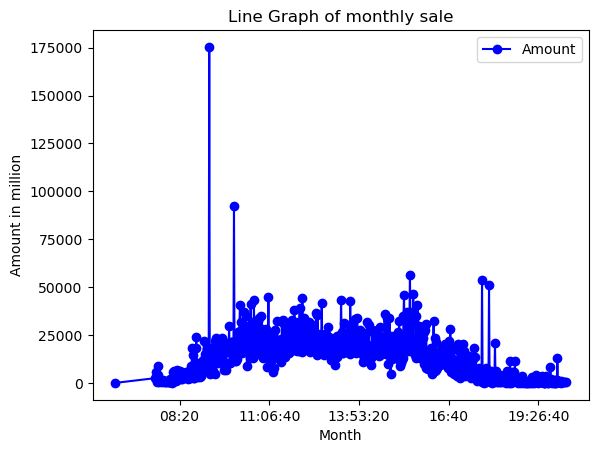

In [89]:
import matplotlib.pyplot as plt
plt.figure()
Time_sale.plot(x='Time', y='Amount' , kind="line", legend=True , marker='o' , color='b' )
plt.title('Line Graph of monthly sale')
plt.xlabel('Month')
plt.ylabel('Amount in million')
plt.show()

In [28]:
Month_sale=Retail_df.groupby('Month').agg({'Amount': 'sum', 'InvoiceNo': 'nunique', 
                                               "CustomerID" : "first" , "Country": "first",
                                              "StockCode" : "nunique","Year": "first" , "Domestic" : "first",
                                         'sqrt_Amount': 'sum', "Time":"first" }).reset_index()
print(Month_sale)

    Month       Amount  InvoiceNo  CustomerID         Country  StockCode  \
0       1   691364.560       1216     13313.0  United Kingdom       2627   
1       2   523631.890       1174     15240.0  United Kingdom       2414   
2       3   717639.360       1665     14620.0  United Kingdom       2553   
3       4   537808.621       1504     18161.0  United Kingdom       2550   
4       5   770536.020       1848     15606.0  United Kingdom       2496   
5       6   761739.900       1683     15643.0  United Kingdom       2662   
6       7   719221.191       1657     16317.0  United Kingdom       2730   
7       8   737014.260       1459     17941.0  United Kingdom       2602   
8       9  1058590.172       1994     13509.0  United Kingdom       2759   
9      10  1154979.300       2275     16353.0  United Kingdom       2888   
10     11  1509496.330       3021     17733.0  United Kingdom       2954   
11     12  1462538.820       2568     17850.0  United Kingdom       3463   

    Year  D

In [84]:
Month_sale.head()

,Month,Amount,InvoiceNo,CustomerID,Country,StockCode,Year,Domestic,sqrt_Amount,Time
0,1,691364.560,1216,13313.0,United Kingdom,2627,2011,1,116134.004323,10:00:00
1,2,523631.890,1174,15240.0,United Kingdom,2414,2011,1,97574.364509,08:23:00
2,3,717639.360,1665,14620.0,United Kingdom,2553,2011,1,128907.982092,08:30:00
3,4,537808.621,1504,18161.0,United Kingdom,2550,2011,1,101751.716927,08:22:00
4,5,770536.020,1848,15606.0,United Kingdom,2496,2011,1,135941.532297,10:51:00


<Figure size 640x480 with 0 Axes>

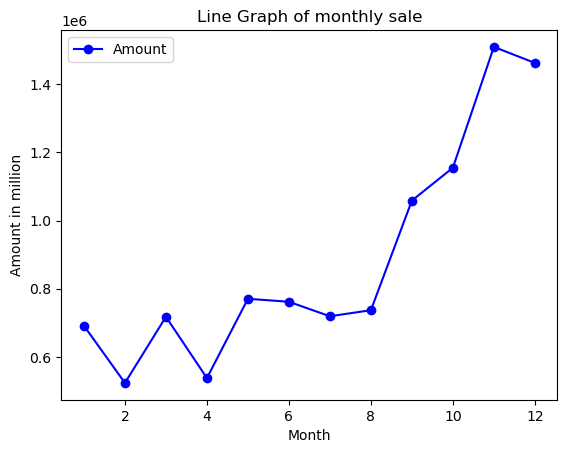

In [29]:
import matplotlib.pyplot as plt
plt.figure()
Month_sale.plot(x='Month', y='Amount' , kind="line", legend=True , marker='o' , color='b' )
plt.title('Line Graph of monthly sale')
plt.xlabel('Month')
plt.ylabel('Amount in million')
plt.show()

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
X_train, X_test, y_train, y_test = train_test_split(Month_sale[['Amount', 'Domestic']],
                                                    Month_sale['Month'],  test_size=0.20)

In [34]:
dtree = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

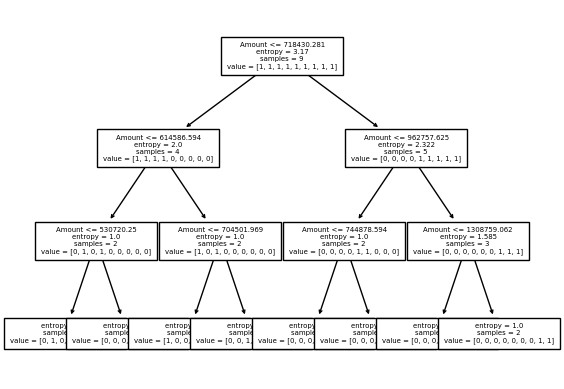

In [35]:
tree.plot_tree(dtree, feature_names=X_train.columns.tolist(), fontsize=5)
plt.savefig('tree_high_dpi', dpi=50)
plt.show()

In [36]:
train_acc = dtree.score(X_train, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 88.88888888888889


In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Month_sale[['Month']], Month_sale[['Amount']])

LinearRegression()

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(Month_sale[['Amount']], model.predict(Month_sale[['Month']]))

0.7495167369601801

In [40]:
import statsmodels.formula.api as smf
import numpy as np
result = smf.ols(formula='Amount ~ Month', data=Month_sale).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     29.92
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           0.000273
Time:                        09:44:14   Log-Likelihood:                -160.79
No. Observations:                  12   AIC:                             325.6
Df Residuals:                      10   BIC:                             326.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.671e+05   1.08e+05      3.411      0.0

C:\ProgramData\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [41]:
b0 = result.params.Intercept
b0

367094.4254999998

In [42]:
b1 = result.params.Month
b1

79992.65792307699

In [43]:
result.get_prediction(pd.Series([500], name='Month')).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.036342e+07,7.216832e+06,2.428332e+07,5.644353e+07,2.427860e+07,5.644825e+07


In [44]:
import numpy as np
test_df = Month_sale.sample(frac=0.5)
train_df = Month_sale[~Month_sale.index.isin(test_df.index)]
print(train_df.shape)
print(test_df.shape)

(6, 10)
(6, 10)


In [51]:
final_model = smf.ols(formula=
"""Month ~ Amount + Domestic + sqrt_Amount + C(Country) """, data=train_df).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Month   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     5.485
Date:                Sun, 21 Jan 2024   Prob (F-statistic):             0.0995
Time:                        09:51:26   Log-Likelihood:                -10.536
No. Observations:                   6   AIC:                             27.07
Df Residuals:                       3   BIC:                             26.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0779      1.328      0.059      

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [52]:
test_predictions = final_model.get_prediction(test_df.iloc[:, 1:]).summary_frame(alpha=0.05)['mean'].tolist()
test_actual = test_df.Amount.tolist()
test_predictions_df = pd.DataFrame([test_predictions, test_actual]).T
test_predictions_df.columns = ['Predicted', 'Actual']
test_predictions_df.head()

,Predicted,Actual
0,5.958364,770536.020
1,5.606799,691364.560
2,5.376226,719221.191
3,3.917995,537808.621
4,8.685988,1154979.300


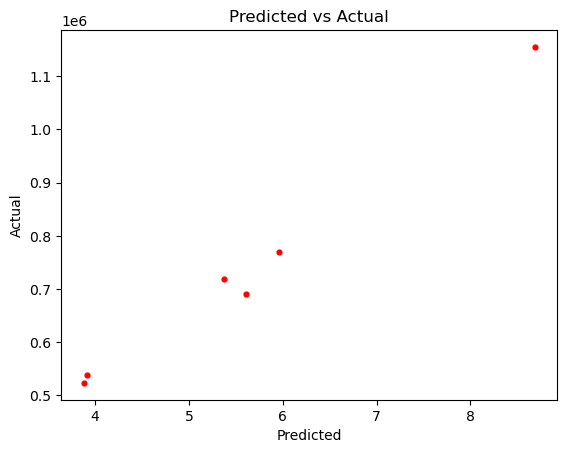

In [53]:
import matplotlib.pyplot as plt

# We have the housing data, let's do a quick scatter plot of price and the area
plt.figure()
# plot
plt.scatter(test_predictions_df['Predicted'], test_predictions_df['Actual'], color='red', s=12)

# add a label to the x axis
plt.xlabel('Predicted')
# add a label to the y axis
plt.ylabel('Actual')
# add a title
plt.title('Predicted vs Actual');

In [54]:
result.rsquared

0.7495167369601801

In [55]:
result.f_pvalue

0.0002729887243899839

In [56]:
infl = result.get_influence()
cooks_distance = infl.summary_frame()['cooks_d']
cooks_distance

0     0.578629
1     0.000073
2     0.048917
3     0.060723
4     0.000024
5     0.012095
6     0.071778
7     0.145506
8     0.002204
9     0.000580
10    0.421831
11    0.178123
Name: cooks_d, dtype: float64

In [70]:
Customer_sale=Retail_df.groupby('CustomerID').agg({'Amount': 'sum', 'InvoiceNo': 'nunique', 
                                               "Month" : "first" , "Country": "first",
                                              "StockCode" : "nunique","Year": "first" , "Domestic" : "first",
                                         'sqrt_Amount': 'sum',}).reset_index()
print(Customer_sale)

      CustomerID    Amount  InvoiceNo  Month         Country  StockCode  Year  \
0        12346.0  77183.60          1      1  United Kingdom          1  2011   
1        12347.0   4310.00          7     12         Iceland        103  2010   
2        12348.0   1797.24          4     12         Finland         22  2010   
3        12349.0   1757.55          1     11           Italy         73  2011   
4        12350.0    334.40          1      2          Norway         17  2011   
...          ...       ...        ...    ...             ...        ...   ...   
4334     18280.0    180.60          1      3  United Kingdom         10  2011   
4335     18281.0     80.82          1      6  United Kingdom          7  2011   
4336     18282.0    178.05          2      8  United Kingdom         12  2011   
4337     18283.0   2094.88         16      1  United Kingdom        263  2011   
4338     18287.0   1837.28          3      5  United Kingdom         59  2011   

      Domestic  sqrt_Amount

In [71]:
Customer_sale.head()

,CustomerID,Amount,InvoiceNo,Month,Country,StockCode,Year,Domestic,sqrt_Amount
0,12346.0,77183.60,1,1,United Kingdom,1,2011,1,277.819366
1,12347.0,4310.00,7,12,Iceland,103,2010,0,836.716338
2,12348.0,1797.24,4,12,Finland,22,2010,0,220.554567
3,12349.0,1757.55,1,11,Italy,73,2011,0,331.473691
4,12350.0,334.40,1,2,Norway,17,2011,0,74.249810


In [77]:
mean_value = Customer_sale['Amount'].mean()
mode_value = Customer_sale['Amount'].mode().iloc[0]  # mode() returns a DataFrame, use iloc[0] to get the first mode
median_value = Customer_sale['Amount'].median()

# Display the results
print(f"Mean: {mean_value}")
print(f"Mode: {mode_value}")
print(f"Median: {median_value}")

Mean: 2053.793017746025
Mode: 76.32000000000001
Median: 674.45


In [80]:
Customer_sale['Customer type'] = np.where((Customer_sale['Amount']>2000) , "priority customer", "Non-regular")
Customer_sale.head()

,CustomerID,Amount,InvoiceNo,Month,Country,StockCode,Year,Domestic,sqrt_Amount,Customer type
0,12346.0,77183.60,1,1,United Kingdom,1,2011,1,277.819366,priority customer
1,12347.0,4310.00,7,12,Iceland,103,2010,0,836.716338,priority customer
2,12348.0,1797.24,4,12,Finland,22,2010,0,220.554567,Non-regular
3,12349.0,1757.55,1,11,Italy,73,2011,0,331.473691,Non-regular
4,12350.0,334.40,1,2,Norway,17,2011,0,74.249810,Non-regular


In [92]:
pd.DataFrame(Customer_sale['Customer type'].value_counts())

,Customer type
Non-regular,3436
priority customer,903


<Axes: >

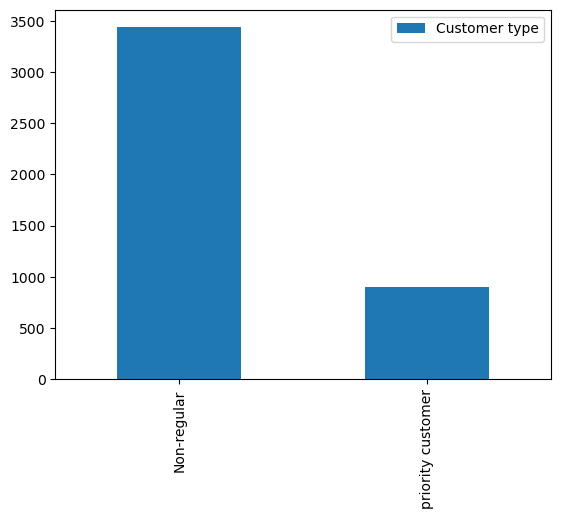

In [91]:
pd.DataFrame(Customer_sale['Customer type'].value_counts()).plot(kind='bar')

<Figure size 640x480 with 0 Axes>

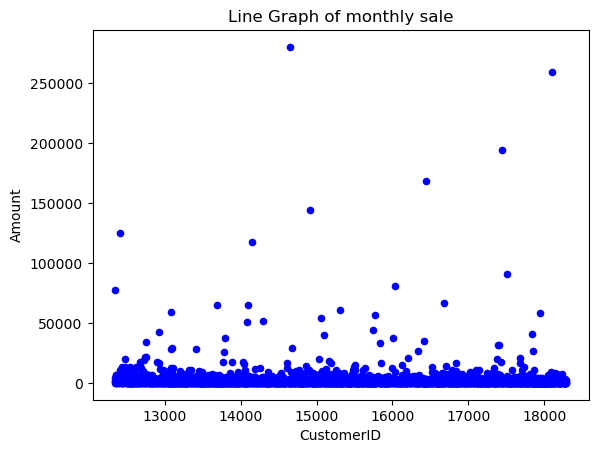

In [64]:
import matplotlib.pyplot as plt
plt.figure()
Customer_sale.plot(x='CustomerID', y='Amount' , kind="scatter", legend=True, color='b' )
plt.title('Line Graph of monthly sale')
plt.xlabel('CustomerID')
plt.ylabel('Amount')
plt.show()